<a href="https://colab.research.google.com/github/mAn-He/mAn-He/blob/main/%EC%A7%91%EA%B0%92_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/housing/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/housing/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이콘/housing/sample_submission.csv')

In [ ]:
train

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,1347,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,1348,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,1349,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [ ]:
train.info()
#결측값이 있는지 확인용으로 사용했습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [ ]:
test.info()
#test 데이터에도 #결측값이 있는지 확인용으로 사용했습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [ ]:
train.columns[(train.dtypes == object)]
#문자열로 표기된 열이 있는데 정확하게 무슨 열이 문자열일까 싶어서 확인용으로 사용했습니다.

Index(['Exter Qual', 'Kitchen Qual', 'Bsmt Qual'], dtype='object')

In [ ]:
train['Exter Qual'].unique(),train['Bsmt Qual'].unique(),train['Kitchen Qual'].unique()
#해당 열의 값들의 종류를 확인하고자 사용했습니다.

(array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object),
 array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object),
 array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object))

In [ ]:
train.drop('id', axis=1, inplace=True) 
test.drop('id', axis=1, inplace=True) 
# id 제거

In [ ]:
train.replace(['Ex','Gd','TA','Fa','Po'], [5, 4, 3, 2, 1], inplace = True)
test.replace(['Ex','Gd','TA','Fa','Po'], [5, 4, 3, 2, 1], inplace = True)
# 라벨인코딩 작업 
#이전에는 get_dummies을 이용한 원핫인코딩을 사용했으나 가중치를 다르게 둔 
#동화님의 코드를 보고 노선을 틀어서 위와같이 작업을 했습니다.

In [ ]:
train
#잘 적용됐는지 확인

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,5,3,968,5,2392,2392,5,2,2003,2003,2003,386250
1,7,1352,4,2,466,4,1352,1352,5,2,2006,2007,2006,194000
2,5,900,3,1,288,3,864,900,3,1,1967,1967,1967,123000
3,5,1174,3,2,576,4,680,680,3,1,1900,2006,2000,135000
4,7,1958,4,3,936,4,1026,1026,4,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,4,2,422,3,872,888,5,2,1996,1997,1996,204000
1346,9,2748,4,3,850,5,1850,1850,5,2,2006,2006,2006,390000
1347,5,1214,3,1,318,3,1214,1214,3,2,1967,1967,1967,143000
1348,5,894,3,2,440,3,864,894,4,1,1974,1974,1974,131000


In [ ]:
train.isna().sum()
#혹시몰라 결측값 재확인

Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

In [ ]:
train.describe()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,3.425926,1.870370,502.014815,3.556296,1082.644444,1167.474074,3.607407,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.573761,0.652483,191.389956,0.663136,384.067713,375.061407,0.695173,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,2.000000,1.000000,100.000000,2.000000,105.000000,480.000000,1.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,3.000000,1.000000,368.000000,3.000000,816.000000,886.250000,3.000000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,3.000000,2.000000,484.000000,3.000000,1009.000000,1092.500000,4.000000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,4.000000,2.000000,588.000000,4.000000,1309.500000,1396.500000,4.000000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,5.000000,1488.000000,5.000000,2660.000000,2898.000000,5.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


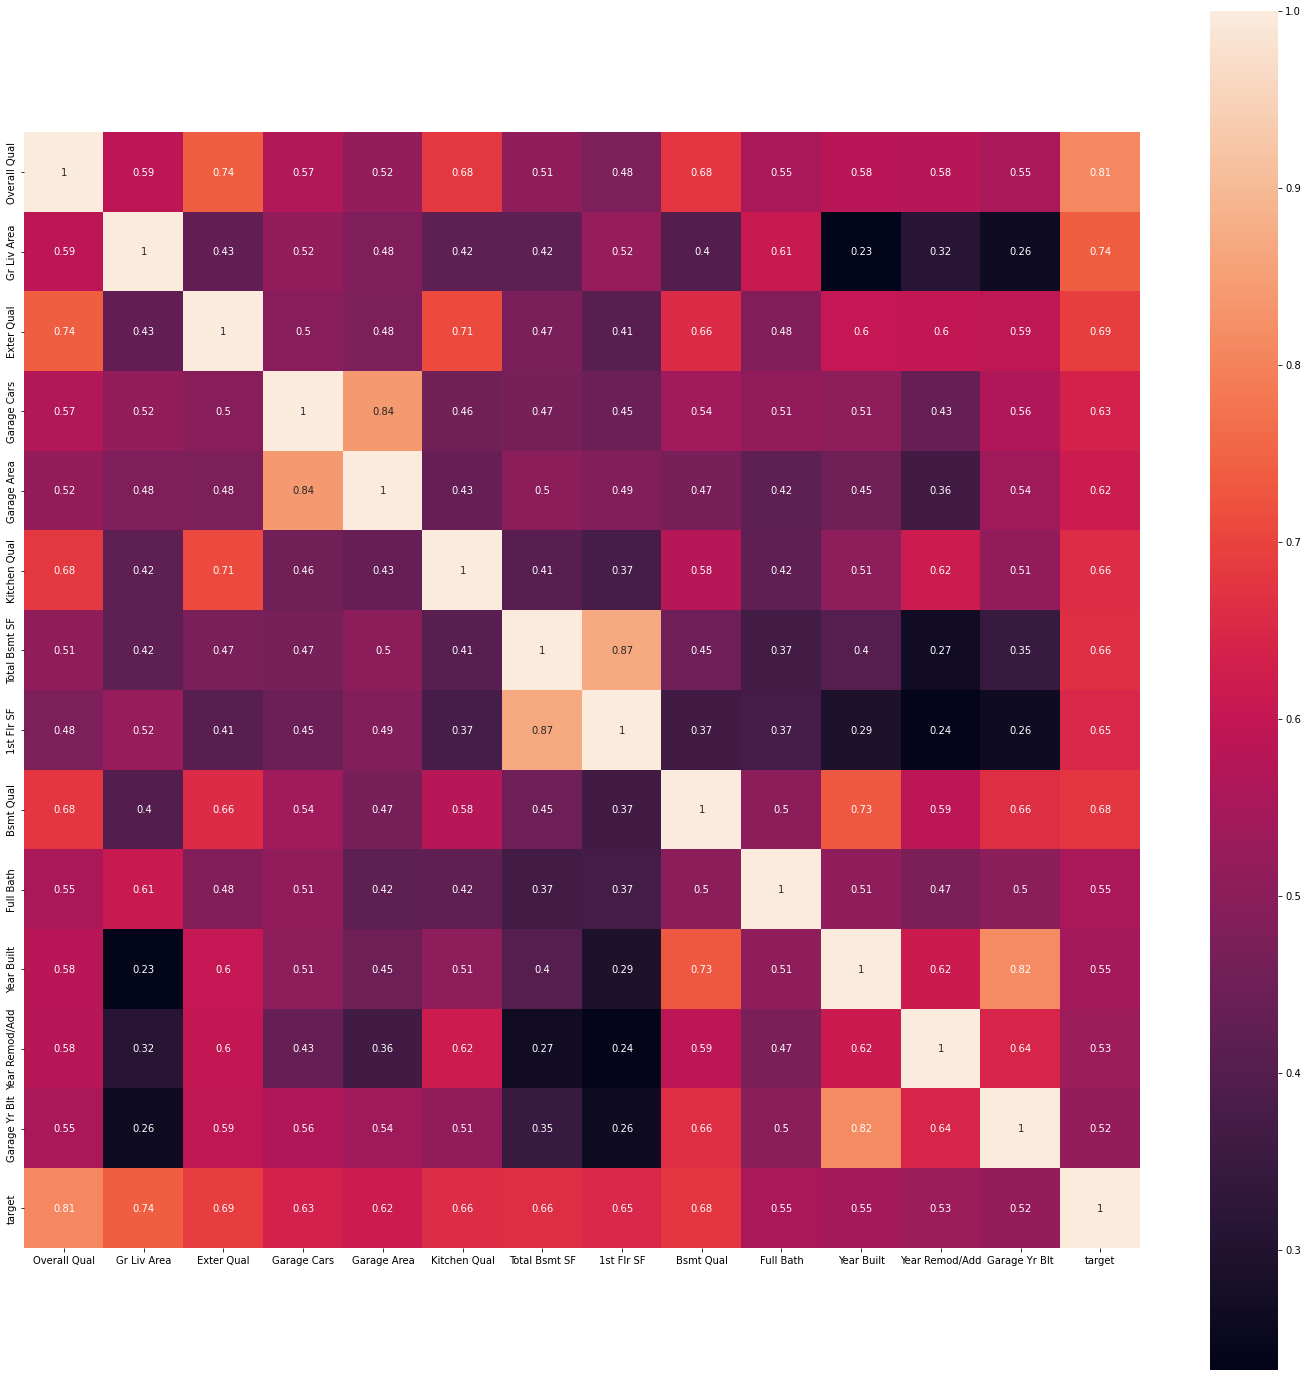

In [ ]:
plt.subplots(figsize=(25,25))

sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

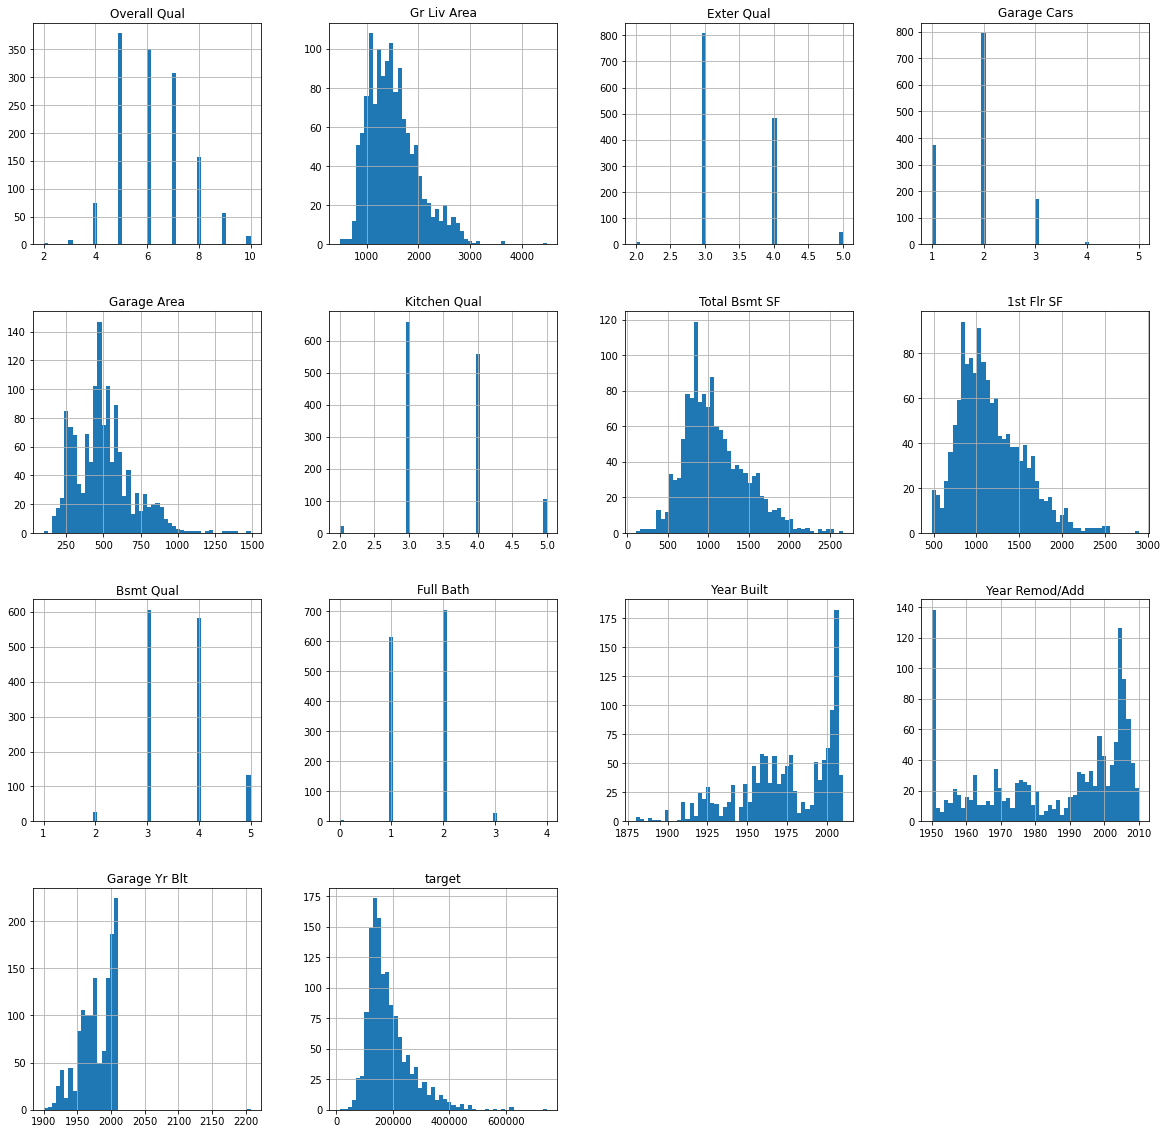

In [ ]:
train.hist(bins=50, figsize=(20,20))
plt.show()
#분포 확인을 위한 그래프
#target의 분포가 왼쪽으로 기울어져 있습니다.

In [ ]:
train.columns

Index(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

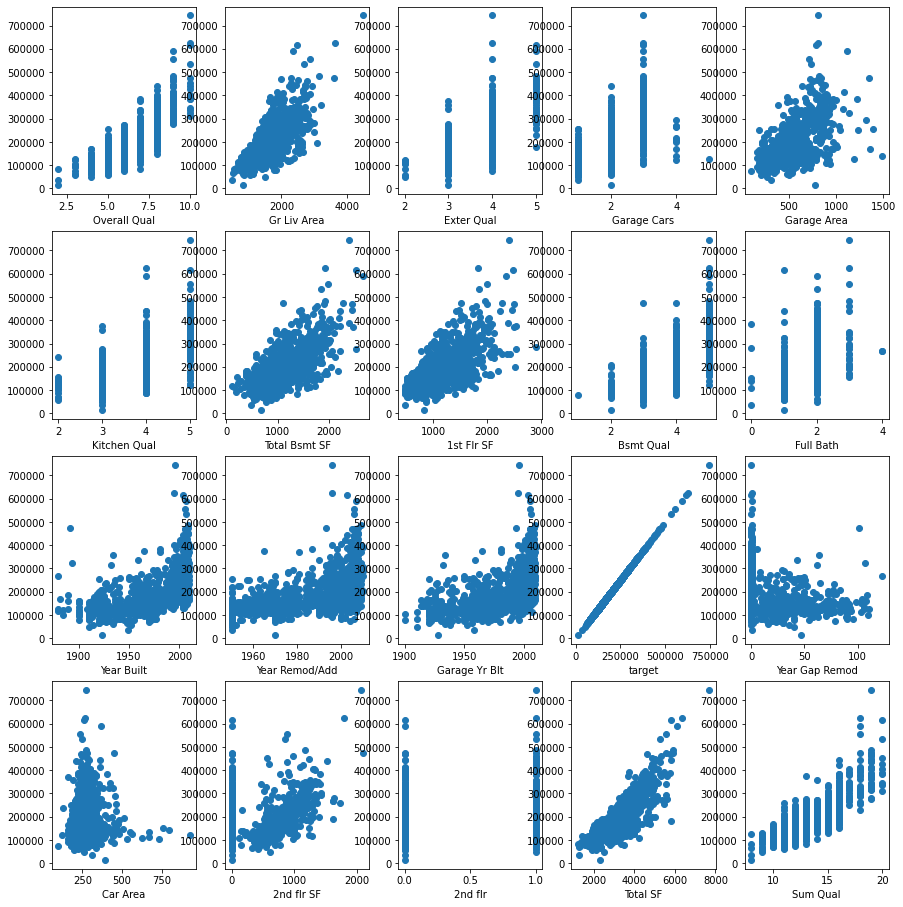

In [ ]:
plt.figure(figsize = (15,20))
for i in range(len(train.columns)-1):
  plt.subplot(5,5,i+1)
  plt.xlabel(train.columns[i])
  plt.scatter(train[train.columns[i]], train['target'])
  #아웃라이어 존재 확인차 scatter plot으로 다시 그렸습니다.

In [ ]:
#아웃라이어로 보이는 값 하나를 그래프로 찾게되어서 자세한 값을 보고자 합니다.
train[train['Garage Yr Blt'] > 2200] 

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,Year Gap Remod,Car Area,2nd flr SF,2nd flr,Total SF,Sum Qual,Garage InOut


In [ ]:
#잘못된 값으로 제거하는 것 대신 단순 실수에 의한 오타로 2007로 변경하는 것이 낫다는 판단으로 진행했습니다.
train.loc[254, 'Garage Yr Blt'] = 2007

In [ ]:
#동화님의 코드를 사용했습니다.
def feature_eng(data_):
  data = data_.copy()
  data['Year Gap Remod'] = data['Year Remod/Add'] - data['Year Built']
  data['Car Area'] = data['Garage Area']/data['Garage Cars']
  data['2nd flr SF'] = data['Gr Liv Area'] - data['1st Flr SF']
  data['2nd flr'] = data['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)
  data['Total SF'] = data[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)
  data['Sum Qual'] = data[["Exter Qual", "Kitchen Qual", "Overall Qual"]].sum(axis=1)
  data['Garage InOut'] = data.apply(lambda x : 1 if x['Gr Liv Area'] != x['1st Flr SF'] else 0, axis=1)
  return data

train = feature_eng(train)
test = feature_eng(test)

In [ ]:
#pip install ngboost
#pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor, Pool
from ngboost import NGBRegressor


In [ ]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [ ]:
X = train.drop(['target'], axis = 1)
y = np.log1p(train['target'])
#target 분포가 정규분포를 따르지 않아서 log를 사용했습니다.
target = test[X.columns]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_log, y_test_log = train_test_split(X ,y, random_state=0, shuffle= True, test_size=0.1)


In [ ]:
#펭귄몸무게 예측 때 어느 분의 코드를 보고 사용했습니다.
#다시 찾으려고 했지만 결국 못 찾았습니다. 알려주시면 추가하겠습니다.
models=[RandomForestRegressor(random_state=0), KNeighborsRegressor(), BaggingRegressor(random_state=0),
        GradientBoostingRegressor(random_state=23), 
        XGBRegressor(random_state=43), LGBMRegressor(random_state=0),
        AdaBoostRegressor(random_state=0), LinearRegression(), SVR(kernel='poly', degree = 2), SVR(kernel='rbf'), 
        Lasso(random_state=0), Ridge(random_state=0),
        ]
     
model_names=['RandomForestRegressor', 'KNeighborsRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor',
             'AdaBoostRegressor', 'LinearRegression', 'SVR_poly', 'SVR_rbf', 'Lasso', 'Ridge'
          ]
nmae_list=[]
# d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train_log)
    test_pred=(clf.predict(x_test))

    k=0
    for i in test_pred:
      if i<0:
        test_pred[k] = 0
      k+=1

    
    nmae_list.append(NMAE(test_pred,y_test_log))


for model in range(len(model_names)):
  print(model_names[model], 'NMAE : \t\t' , nmae_list[model] , '\n')



[09:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RandomForestRegressor NMAE : 		 0.007727076205032626 

KNeighborsRegressor NMAE : 		 0.011815581912701562 

BaggingRegressor NMAE : 		 0.008376502030197897 

GradientBoostingRegressor NMAE : 		 0.008022297966713079 

XGBRegressor NMAE : 		 0.008137370422151539 

LGBMRegressor NMAE : 		 0.007597743506660794 

AdaBoostRegressor NMAE : 		 0.010025822831267716 

LinearRegression NMAE : 		 0.008524653447270596 

SVR_poly NMAE : 		 0.010770068280820007 

SVR_rbf NMAE : 		 0.011154005905979987 

Lasso NMAE : 		 0.010482906649269636 

Ridge NMAE : 		 0.008523994640786497 



In [ ]:
RandomForestRegressor NMAE : 		 0.007727076205032626 

GradientBoostingRegressor NMAE : 		 0.008022297966713079 

XGBRegressor NMAE : 		 0.008137370422151539 

LGBMRegressor NMAE : 		 0.007597743506660794 

#점수 높은거 4개 뽑아놓은 거 입니다. 

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = {
    "n_estimators" : [100,120,140,160,180,200,250,300,500,1000],
    'n_jobs' : [-1],
    'learning_rate': [0.1, 0.05, 0.06, 0.08],
    'max_depth' : [ 4,6,8,10,12]
    }
    
#cv=5 5번의 교차검증.
grid = GridSearchCV(LGBMRegressor(random_state=0), verbose=2, param_grid = parameters, cv=5)
grid.fit(x_train, y_train_log)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=120, n_jobs=-1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_est

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.05, 0.06, 0.08],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [100, 120, 140, 160, 180, 200, 250,
                                          300, 500, 1000],
                         'n_jobs': [-1]},
             verbose=2)

In [ ]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 120, 'n_jobs': -1}

In [ ]:
parameters = {'learning_rate': 0.05, 'max_depth': 4, 
              'n_estimators': 120, 'n_jobs': -1}
lgb = LGBMRegressor(random_state=0, 
                    learning_rate=0.05, max_depth= 4, 
              n_estimators= 120, n_jobs= -1, reg_lambda=5)
lgb.fit(x_train,y_train_log)
test_pred=(lgb.predict(x_test))

(NMAE(test_pred,y_test_log))

#파라미터 튜닝 전 vs 후 NMAE 비교를 통해 나은 거 선택하기 위해서 진행했습니다.

0.007513929556696572

In [ ]:
parameters = {
    "n_estimators" : [100,150,1000],
    'max_depth' : [2,3,4,5,6,7,8,9,20]
    
    
    }
    

#cv=5 5번의 교차검증.
grid = GridSearchCV(RandomForestRegressor(random_state=0), verbose=2, param_grid = parameters, cv=5)
grid.fit(x_train, y_train_log)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.4s
[CV] END .....................max_depth=2, n_estimators=1000; total time=   2.5s
[CV] END .....................max_depth=2, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 20],
                         'n_estimators': [100, 150, 1000]},
             verbose=2)

In [ ]:
grid.best_params_

{'max_depth': 20, 'n_estimators': 1000}

In [ ]:
parameters = {'max_depth': 20, 'n_estimators': 1000}
rfr = RandomForestRegressor(max_depth= 20, 
              n_estimators= 1000)
rfr.fit(x_train,y_train_log)
test_pred=(rfr.predict(x_test))

(NMAE(test_pred,y_test_log))


0.007686020992415452

In [ ]:
parameters = {
    "n_estimators" : [100,150,200],
    'min_samples_split' : [6,8,10],
    'learning_rate': [0.1, 0.05],
    'max_depth' : [ 4,6,8]
    }
    
#verbose = 2 -> Grid Search 반복시 하이퍼 파라메타별 메시지를 화면에 출력 
#cv=5 5번의 교차검증.
grid = GridSearchCV(GradientBoostingRegressor(random_state=0), verbose=2, param_grid = parameters, cv=5)
grid.fit(x_train, y_train_log)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=6, n_estimators=150; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=4, min_sa

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [4, 6, 8],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [ ]:
grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_split': 8,
 'n_estimators': 150}

In [ ]:
parameters = {'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_split': 8,
 'n_estimators': 150}
gbr = GradientBoostingRegressor(learning_rate= 0.05,
 max_depth= 4,
 min_samples_split= 8,
 n_estimators=150, random_state=0)
gbr.fit(x_train,y_train_log)
test_pred=(gbr.predict(x_test))

(NMAE(test_pred,y_test_log))

0.0076440718642146795

In [ ]:
parameters = {
    "n_estimators" : [100,200,500],
    'max_depth' : [2,3,5],
    'n_jobs' : [-1],
    'learing_rate' : [0.1, 0.05, 0.01]
    }
    
#verbose = 2 -> Grid Search 반복시 하이퍼 파라메타별 메시지를 화면에 출력 
#cv=5 5번의 교차검증.
grid = GridSearchCV(XGBRegressor(random_state=0), parameters, verbose=2, cv=5)
grid.fit(x_train, y_train_log)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[09:42:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learing_rate=0.1, max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[09:42:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learing_rate=0.1, max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[09:42:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learing_rate=0.1, max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[09:42:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learing_rate=0.1, max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[09:42:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learing_rate': [0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 200, 500], 'n_jobs': [-1]},
             verbose=2)

In [ ]:
grid.best_params_

{'learing_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'n_jobs': -1}

In [ ]:
parameters = {'learing_rate': 0.1, 'max_depth': 3, 
              'n_estimators': 200, 'n_jobs': -1}
xgb = XGBRegressor(learning_rate= 0.1,
 max_depth= 3,
 n_jobs=-1 ,
 n_estimators=200, random_state=0)
xgb.fit(x_train,y_train_log)
test_pred=(xgb.predict(x_test))

(NMAE(test_pred,y_test_log))

[09:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.008071513176715908

In [ ]:
lgb_p = lgb.predict(target)
rfr_p = rfr.predict(target)
gbr_p = gbr.predict(target)
xgb_p = xgb.predict(target)
#이미 위에서 파라미터 튜닝 버전으로 모델을 만들고 학습해서 간단하게 작성

In [ ]:
lgb_pred = (np.expm1(lgb_p.reshape(-1,1)))
rfr_pred =  (np.expm1(rfr_p.reshape(-1,1)))
gbr_pred = (np.expm1(gbr_p.reshape(-1,1)))
xgb_pred = (np.expm1(xgb_p.reshape(-1,1)))

In [ ]:
#값들이 잘 나오는지  확인 해봅니다.
#전에 랜덤포레스트가 Nan 값이 나온적이 있어서 일일이 확인합니다.
lgb_pred

array([[330771.76359701],
       [126646.25152757],
       [176219.48959436],
       ...,
       [ 75252.5259203 ],
       [179719.02985698],
       [126523.33054666]])

In [ ]:
gbr_pred

array([[330387.28533711],
       [128682.71357364],
       [179386.83737326],
       ...,
       [ 89220.23998471],
       [178954.95460328],
       [114503.41490251]])

In [ ]:
rfr_pred

array([[329852.55777673],
       [127798.23865508],
       [179294.37083671],
       ...,
       [ 92027.19806586],
       [183820.27956151],
       [126687.42551572]])

In [ ]:
xgb_pred

array([[345505.12 ],
       [131578.17 ],
       [175679.9  ],
       ...,
       [ 78073.664],
       [181213.58 ],
       [139330.1  ]], dtype=float32)

In [ ]:
Hosuing1 = (lgb_pred*0.3 + rfr_pred*0.2 +gbr_pred*0.3 + xgb_pred*0.2)
Hosuing1


array([[333419.24967308],
       [128473.972027  ],
       [177676.75272638],
       ...,
       [ 83362.00278311],
       [180608.96609413],
       [125511.52826914]])

In [ ]:
submission['target'] = Hosuing1
submission.to_csv('Hosuing11.csv', index=False)